# Loan Status Prediction

## Importing Libraries

In [704]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns

## Loading Dataset to pandas dataframe

In [705]:
loan_dataset = pd.read_csv("data/loan_dataset.csv")

In [706]:
loan_dataset.shape

(614, 13)

In [707]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Checking the dataset contain null values

In [708]:
print(loan_dataset.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


## Removing the missing values

In [709]:
loan_dataset = loan_dataset.dropna()

In [710]:
print(loan_dataset.isnull().sum()) # after removing the missing values checking is there any missing values or not

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


## Statistical measurement to know about the dataset

In [711]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


## Label Encoding

### converting the string(Y,N) data field into a bool

In [712]:
loan_dataset['Loan_Status'].value_counts()


Y    332
N    148
Name: Loan_Status, dtype: int64

In [713]:
loan_dataset.replace({"Loan_Status":{"Y":1,"N":0}},inplace=True)#(inplace=True) modify the DataFrame rather than creating a new one

In [714]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [715]:
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [716]:
loan_dataset.replace(to_replace='3+',value=4,inplace=True)

In [717]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

## Visualizing the Education Loans

<AxesSubplot: xlabel='Education', ylabel='count'>

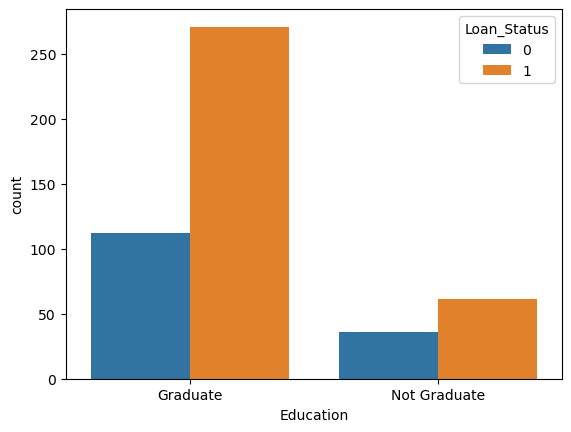

In [718]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

## Convert all string datatset into numeric

In [719]:
loan_dataset.replace({"Gender" :{"Male":1,"Female":0},"Married":{"Yes":1,"No":0},"Education":{"Graduate":1,"Not Graduate":0},"Property_Area":{"Rural":0,"Semiurban":1,"Urban":2},"Self_Employed":{"Yes" :1,"No":0}},inplace=True)

now replaced all the string's to numeric

# Splitting data into X and Y

In [720]:
X = loan_dataset.drop(['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [721]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2


In [722]:
print(X.shape,Y.shape)

(480, 11) (480,)


## Splitting Datasets into Training set and Test set

In [723]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,stratify=Y,random_state=2)

In [724]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (384, 11) (96, 11)


In [725]:
X_train['Dependents'].value_counts()

0    218
1     68
2     64
4     34
Name: Dependents, dtype: int64

## Training the SVM model on the Training set

In [726]:
model = SVC(kernel='linear',random_state=2)
model.fit(X_train,Y_train)

SVC(kernel='linear', random_state=2)

## Evaluating The Train set

In [731]:
train_data_predicted = model.predict(X_train)
accuracy_score(Y_train,train_data_predicted)

0.7838541666666666

## Evaluating the Test Set

In [732]:
test_data_predicted = model.predict(X_test)
accuracy_score(Y_test,test_data_predicted)

0.8125